In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv(r"sample_clean.csv")

In [105]:
df=dataset.copy()

In [4]:
X = df.drop('action_taken',axis=1)
Y = df['action_taken']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25) 

In [5]:
dataset['action_taken'].value_counts()

1    1678167
0      11337
Name: action_taken, dtype: int64

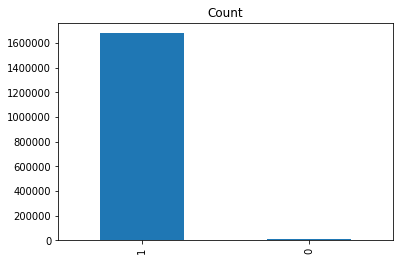

In [80]:
dataset.action_taken.value_counts().plot(kind='bar', title='Count');

### SMOTE Analysis 

In [13]:
smt = SMOTE()
x_train, y_train = smt.fit_sample(X_train, Y_train)
np.bincount(Y_train)
np.bincount(y_train)

array([1258599, 1258599])

In [ ]:
dataset.action_taken.value_counts().plot(kind='bar', title='Count');

In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
X_test = sc.transform(X_test)

### Random Forest 

In [15]:
rand_class_smote = RandomForestClassifier(n_estimators = 8,random_state=2)
rand_class_smote.fit(x_train, y_train)
y_pred_smote = rand_class_smote.predict(X_test)
y_pred_train_smote = rand_class_smote.predict(x_train)

In [98]:
print("Test")
print('Accuracy:',accuracy_score(Y_test,y_pred_smote))
print('\n')
print('Precision of 0:',precision_score(Y_test,y_pred_smote,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_smote,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_smote,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_smote,pos_label=1))

print("------------------------")
print("Train")
print('Accuracy:',accuracy_score(y_train,y_pred_train_smote))


Test
Accuracy: 0.9914365399549216


Precision of 0: 0.3374849337083166
Precision of 1: 0.9953130246947393


Recall of 0: 0.29914529914529914
Recall of 1: 0.9960697669984365
------------------------
Train
Accuracy: 0.9997930238304654


[[   840   1968]
 [  1649 417919]]


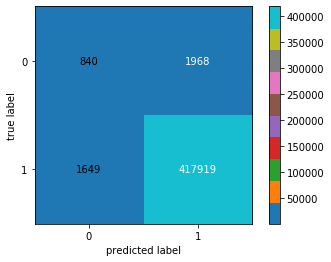

In [146]:
conf_matrix = confusion_matrix(Y_test, y_pred_smote)
plot_confusion_matrix(conf_matrix,cmap='tab10',colorbar=True)
print(conf_matrix)

In [87]:
print(confusion_matrix(Y_test,y_pred_log,labels=[0,1]))

[[  2804      4]
 [ 13348 406220]]


In [23]:
# save the model to disk
#joblib_file_random_forest = "rand_class_smote.pkl"
#joblib.dump(rand_class_smote, joblib_file_random_forest)

['rand_class_smote.pkl']

In [34]:
print(classification_report(Y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       0.34      0.30      0.32      2808
           1       1.00      1.00      1.00    419568

    accuracy                           0.99    422376
   macro avg       0.67      0.65      0.66    422376
weighted avg       0.99      0.99      0.99    422376



### Logistic Regression

In [17]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_pred_train_log = log_reg.predict(x_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [99]:
print('Test')
print('Accuracy',accuracy_score(y_pred_log,Y_test))

print('Precision of 0:',precision_score(Y_test,y_pred_log,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_log,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_log,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_log,pos_label=1))

print('Recall',recall_score(y_pred_log,Y_test))
print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_train_log,y_train))

Test
Accuracy 0.968388355398981
Precision of 0: 0.17360079247152055
Precision of 1: 0.9999901532159596


Recall of 0: 0.9985754985754985
Recall of 1: 0.9681863249818862
Recall 0.9999901532159596
--------------------------
Train
Accuracy 0.9838352008860646


[[  2804      4]
 [ 13348 406220]]


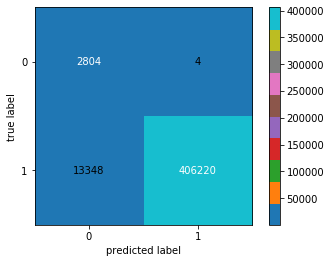

In [148]:
conf_matrix = confusion_matrix(Y_test, y_pred_log)
plot_confusion_matrix(conf_matrix,cmap='tab10',colorbar=True)
print(conf_matrix)

In [24]:
# save the model to disk
#joblib_file_logistic = "log_reg.pkl"
#joblib.dump(log_reg, joblib_file_logistic)

['log_reg.pkl']

In [35]:
print(classification_report(Y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.17      1.00      0.30      2808
           1       1.00      0.97      0.98    419568

    accuracy                           0.97    422376
   macro avg       0.59      0.98      0.64    422376
weighted avg       0.99      0.97      0.98    422376



### Naive Bayes

In [19]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
y_pred_naive = naive_bayes.predict(X_test)
y_pred_train_naive = naive_bayes.predict(x_train)

In [100]:
print('Test')
print('Accuracy',accuracy_score(y_pred_naive,Y_test))
print('Precision of 0:',precision_score(Y_test,y_pred_naive,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_naive,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_naive,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_naive,pos_label=1))

print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_train_naive,y_train))

Test
Accuracy 0.9700669545618122
Precision of 0: 0.17861577674661785
Precision of 1: 0.9998157587668121


Recall of 0: 0.9732905982905983
Recall of 1: 0.9700453800099149
--------------------------
Train
Accuracy 0.9784530259439266


[[  2733     75]
 [ 12568 407000]]


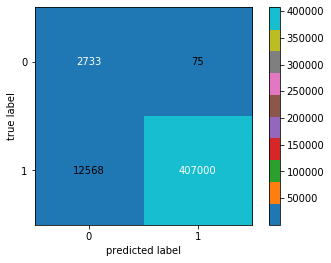

In [149]:
conf_matrix = confusion_matrix(Y_test, y_pred_naive)
plot_confusion_matrix(conf_matrix,cmap='tab10',colorbar=True)
print(conf_matrix)

In [25]:
# save the model to disk
#joblib_file_naive_bayes = "naive_bayes.pkl"
#joblib.dump(naive_bayes, joblib_file_naive_bayes)

['naive_bayes.pkl']

In [36]:
print(classification_report(Y_test,y_pred_naive))

              precision    recall  f1-score   support

           0       0.18      0.97      0.30      2808
           1       1.00      0.97      0.98    419568

    accuracy                           0.97    422376
   macro avg       0.59      0.97      0.64    422376
weighted avg       0.99      0.97      0.98    422376



### LDA

In [21]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_pred_lda = lda.predict(X_test)
y_pred_train_lda = lda.predict(x_train)

//anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [101]:
print('Test')
print('Accuracy',accuracy_score(y_pred_lda,Y_test))
print('Precision of 0:',precision_score(Y_test,y_pred_lda,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_lda,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_lda,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_lda,pos_label=1))

print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_train_lda,y_train))

Test
Accuracy 0.9582812470405515
Precision of 0: 0.1373096322413202
Precision of 1: 0.9999900486372852


Recall of 0: 0.9985754985754985
Recall of 1: 0.9580115738092514
--------------------------
Train
Accuracy 0.9786516595039405


[[  2804      4]
 [ 17617 401951]]


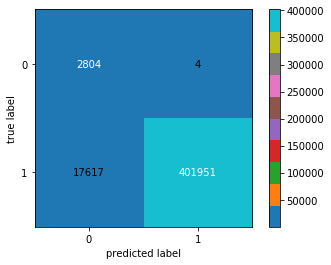

In [150]:
conf_matrix = confusion_matrix(Y_test, y_pred_lda)
plot_confusion_matrix(conf_matrix,cmap='tab10',colorbar=True)
print(conf_matrix)

In [37]:
print(classification_report(Y_test,y_pred_lda))

              precision    recall  f1-score   support

           0       0.14      1.00      0.24      2808
           1       1.00      0.96      0.98    419568

    accuracy                           0.96    422376
   macro avg       0.57      0.98      0.61    422376
weighted avg       0.99      0.96      0.97    422376



In [26]:
# save the model to disk
#joblib_file_lda = "lda.pkl"
#joblib.dump(lda, joblib_file_lda)

['lda.pkl']

### XG Boost

In [38]:
from xgboost import XGBClassifier

xg_boost = XGBClassifier()
xg_boost.fit(x_train,y_train)
y_pred_xg = xg_boost.predict(X_test)
y_pred_xg_train = xg_boost.predict(x_train)

In [102]:
print('Accuracy test',accuracy_score(y_pred_xg,Y_test))
print('Precision of 0:',precision_score(Y_test,y_pred_xg,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_xg,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_xg,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_xg,pos_label=1))

print('Recall',recall_score(y_pred_xg,Y_test))
print('Accuracy Train',accuracy_score(y_pred_xg_train,y_train))

Accuracy test 0.9787085440460632
Precision of 0: 0.21806910383808917
Precision of 1: 0.9989888358729919


Recall of 0: 0.8518518518518519
Recall of 1: 0.9795575449033291
Recall 0.9989888358729919
Accuracy Train 0.9889297544333024


[[  2392    416]
 [  8577 410991]]


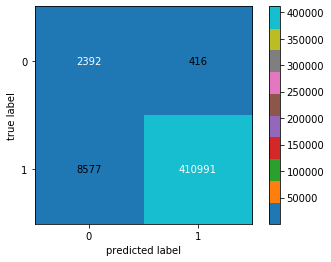

In [151]:
conf_matrix = confusion_matrix(Y_test, y_pred_xg)
plot_confusion_matrix(conf_matrix,cmap='tab10',colorbar=True)
print(conf_matrix)

In [41]:
# save the model to disk
#joblib_file_xgboost = "xgboost.pkl"
#joblib.dump(xg_boost, joblib_file_xgboost)

['xgboost.pkl']

In [42]:
print(classification_report(Y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.22      0.85      0.35      2808
           1       1.00      0.98      0.99    419568

    accuracy                           0.98    422376
   macro avg       0.61      0.92      0.67    422376
weighted avg       0.99      0.98      0.98    422376



### Adaboost

In [43]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=12)
ada_boost.fit(x_train, y_train)
y_pred_ada = ada_boost.predict(X_test)
y_pred_ada_train = ada_boost.predict(x_train)

In [103]:
print('Test')
print('Accuracy test',accuracy_score(y_pred_ada,Y_test))
print('Precision of 0:',precision_score(Y_test,y_pred_ada,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_ada,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_ada,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_ada,pos_label=1))

print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_ada_train,y_train))

Test
Accuracy test 0.991273178400288
Precision of 0: 0.3267561168113654
Precision of 1: 0.9952839401489132


Recall of 0: 0.2948717948717949
Recall of 1: 0.9959339129771575
--------------------------
Train
Accuracy 0.9975611771501487


[[   828   1980]
 [  1706 417862]]


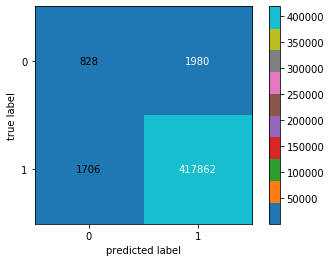

In [152]:
conf_matrix = confusion_matrix(Y_test, y_pred_ada)
plot_confusion_matrix(conf_matrix,cmap='tab10',colorbar=True)
print(conf_matrix)

In [45]:
#joblib_file_adaboost = "adaboost.pkl"
#joblib.dump(ada_boost, joblib_file_adaboost)

['adaboost.pkl']

In [47]:
print(classification_report(Y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.33      0.29      0.31      2808
           1       1.00      1.00      1.00    419568

    accuracy                           0.99    422376
   macro avg       0.66      0.65      0.65    422376
weighted avg       0.99      0.99      0.99    422376



AUC for  Random Forest  =  0.6476075330718678
AUC for  Logistic Regression  =  0.9833809117786922
AUC for  Naive Bayes  =  0.9716679891502567
AUC for  LDA  =  0.9782935361923749
AUC for  XGBoost  =  0.9157046983775905
AUC for  AdaBoost  =  0.645402853924476


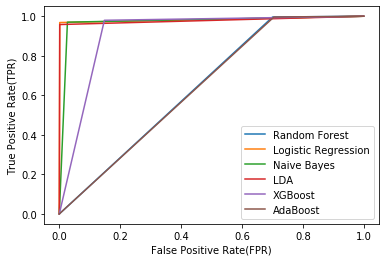

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classifier_predictions = [y_pred_smote,y_pred_log,y_pred_naive,y_pred_lda,y_pred_xg,y_pred_ada]
classifier_names = ["Random Forest","Logistic Regression",'Naive Bayes','LDA','XGBoost','AdaBoost']
for i in range(len(classifier_predictions)):
    fpr,tpr,thresholds = roc_curve(Y_test,classifier_predictions[i])
    plt.plot(fpr,tpr,label= classifier_names[i])
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.legend()
    print("AUC for ",classifier_names[i]," = ",auc(fpr,tpr))


Precision Recall score for  Random Forest  =  0.9953053169980692
Precision Recall score for  Logistic Regression  =  0.999778965826201
Precision Recall score for  Naive Bayes  =  0.9996221361838308
Precision Recall score for  LDA  =  0.9997113230129927
Precision Recall score for  XGBoost  =  0.9988736029621913
Precision Recall score for  AdaBoost  =  0.9952760842851813


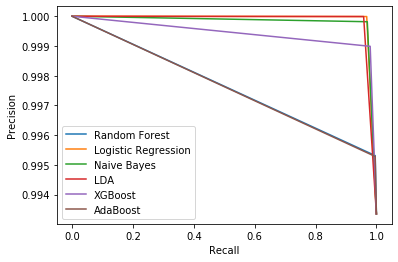

In [86]:
from sklearn.metrics import precision_recall_curve

classifier_predictions = [y_pred_smote,y_pred_log,y_pred_naive,y_pred_lda,y_pred_xg,y_pred_ada]
classifier_names = ["Random Forest","Logistic Regression",'Naive Bayes','LDA','XGBoost','AdaBoost']

for i in range(len(classifier_predictions)):
    precision, recall, thresholds = precision_recall_curve(Y_test,classifier_predictions[i])
    plt.plot(recall,precision,label= classifier_names[i])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    print("Precision Recall score for ",classifier_names[i]," = ",(average_precision_score(Y_test,classifier_predictions[i])))


### Selected top features that we got from Lasso and Random Forest and run our model

In [69]:
features = ['aus_1','applicant_credit_score_type','loan_term','purchaser_type','property_value','loan_purpose','income','applicant_age','loan_amount','manufactured_home_land_property_interest']
X_new = df[features]
Y_new = df['action_taken']
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size=0.25) 

In [70]:
smt = SMOTE()
x_train_new, y_train_new = smt.fit_sample(X_train_new, Y_train_new)
np.bincount(Y_train_new)
np.bincount(y_train_new)

sc = StandardScaler()
x_train_new = sc.fit_transform(x_train_new)
X_test_new = sc.transform(X_test_new)

In [71]:
log_reg_top = LogisticRegression()
log_reg_top.fit(x_train_new, y_train_new)
y_pred_log_top = log_reg_top.predict(X_test_new)
y_pred_train_log_top = log_reg_top.predict(x_train_new)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
print('Accuracy Test',accuracy_score(y_pred_log_top,Y_test_new))
print('Accuracy Train',accuracy_score(y_pred_train_log_top,y_train_new))

Accuracy Test 0.9673655700134477
Accuracy Train 0.9834459421881182


In [73]:
print(classification_report(y_pred_log_top,Y_test_new))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29     16609
           1       0.97      1.00      0.98    405767

    accuracy                           0.97    422376
   macro avg       0.98      0.59      0.64    422376
weighted avg       0.97      0.97      0.96    422376



In [77]:
rand_class_top = RandomForestClassifier(n_estimators = 8,random_state=2)
rand_class_top.fit(x_train_new, y_train_new)
y_pred_rand_top = rand_class_top.predict(X_test_new)
y_pred_rand_train_top = rand_class_top.predict(x_train_new)

In [78]:
print('Accuracy Test',accuracy_score(y_pred_rand_top,Y_test_new))
print('Accuracy Train',accuracy_score(y_pred_rand_train_top,y_train_new))

Accuracy Test 0.9873382957365002
Accuracy Train 0.9969717169566371


In [79]:
print(classification_report(y_pred_rand_top,Y_test_new))

              precision    recall  f1-score   support

           0       0.36      0.22      0.28      4553
           1       0.99      1.00      0.99    417823

    accuracy                           0.99    422376
   macro avg       0.68      0.61      0.64    422376
weighted avg       0.98      0.99      0.99    422376



In [81]:
ada_boost_top = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=12)
ada_boost_top.fit(x_train_new, y_train_new)
y_pred_ada_top = ada_boost_top.predict(X_test_new)
y_pred_ada_train_top = ada_boost_top.predict(x_train_new)
print('Accuracy Test',accuracy_score(y_pred_ada_top,Y_test_new))
print('Accuracy Train',accuracy_score(y_pred_ada_train_top,y_train_new))
print(classification_report(y_pred_ada_top,Y_test_new))

Accuracy Test 0.977141220145084
Accuracy Train 0.9887457354560579
              precision    recall  f1-score   support

           0       0.74      0.19      0.30     11000
           1       0.98      1.00      0.99    411376

    accuracy                           0.98    422376
   macro avg       0.86      0.59      0.65    422376
weighted avg       0.97      0.98      0.97    422376



Precision Recall score for  Random Forest  =  0.9956264833943154
Precision Recall score for  Logistic Regression  =  0.9997575425387186
Precision Recall score for  AdaBoost  =  0.998075044641125


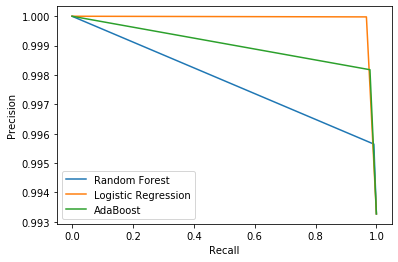

In [85]:
from sklearn.metrics import precision_recall_curve

classifier_predictions = [y_pred_rand_top,y_pred_log_top,y_pred_ada_top]
classifier_names = ["Random Forest","Logistic Regression",'AdaBoost']

for i in range(len(classifier_predictions)):
    precision, recall, thresholds = precision_recall_curve(Y_test_new,classifier_predictions[i])
    plt.plot(recall,precision,label= classifier_names[i])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    print("Precision Recall score for ",classifier_names[i]," = ",(average_precision_score(Y_test_new,classifier_predictions[i])))

